<a href="https://colab.research.google.com/github/thravt/AIProjectsHomework/blob/main/HW1_Tyler_Thraves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets
import math
import pandas as pd
import matplotlib.pyplot as plt
import opendatasets as od
import numpy as np
import seaborn as sns
import random

Task 1 (20 points): Advanced Objective Function and Use Case


1. Derive the objective function for Logistic Regression using Maximum Likelihood
Estimation (MLE). Do some research on the MAP technique for Logistic Regression,
include your research on how this technique is different from MLE (include citations).


The MLE objective function for Logistic regression is NLL.
This is given as:



```
NLL(w) = -1/N log p(D|w) = -1/N log ∏ᴺ Ber(yₙ, μₙ)
```
In the above code, Ber(y|a) = (1-a) if y = 0, and a if y = 1.
D is the data set, and w is the weight vector (counting the bias term).
μₙ is equal to σ(wᵀxₙ), the sigmoid function on the weights for that entry/ the sigmoid function applied to the logit, since binary classification uses the sigmoid function.


The equation can be expanded out by moving from log of product to sum of log:
```
NLL(w) = -1/N ∑ᴺ log[μₙ^yₙ * (1-μₙ)^(1-yₙ)]
```
Applying the log directly gives us:

```
NLL(w) = -1/N ∑ᴺ [yₙlog(μₙ) * (1-yₙ)log(1-μₙ)]
```



MAP is similar to MLE, but includes the prior probability P(Θ), replacing P(D|Θ) with P(D|Θ)P(Θ). If the prior is constant, it can be ignored, and thus is equal to MLE. Otherwise, it has to be factored into the equation. MLE is often better when there's a lot of data, and MAP is better when there is very little data.

Source: https://medium.com/@devcharlie2698619/the-intuition-behind-maximum-likelihood-estimation-mle-and-maximum-a-posteriori-estimation-map-b8ba1ba1078f#:~:text=MLE's%20power%20lies%20in%20its,new%20evidence%20with%20existing%20beliefs.


2. Define a machine learning problem you wish to solve using Logistic Regression. Justify
why logistic regression is the best choice and compare it briefly to another linear
classification model (cite your work if this other technique was not covered in class).

A problem I would like to solve is the eligibility for a loan. I feel like logistic regression is the best choice as the data may not be linearly seperable, and it should fit the binary output well.

The binary nature of outputs would make linear regression a bad choice, as the data would be in 2 straight lines instead of just fitting to a single line, whereas the sigmoid function of logistic regression should fit that well.

There's also the fact that the data may not fit linearly to the output, which would cause problems in a Decision Tree based algorithm.

3. Discuss how your dataset corresponds to the variables in your equations, highlighting
any assumptions in your derivation from part 1.

My dataset corresponds to the variables, as the w parameters will correspond to the gender, mairrage status, # of dependents, education level, whether or not they're self employed, the applicant's income, the coapplicant's income, the loan amount, the duration of the loan, whether their credit history meets the guidelines, and the location of their home. The 'b' parameter acts as the intercept. The y value will be a binary label, stating whether the loan was approved or rejected.

Task 2 (20 points): Dataset and Advanced EDA

1. Select a publicly available dataset (excluding commonly used datasets such as Titanic,
Housing Prices or Iris). Provide a link to your dataset. Ensure the dataset has at least 10
features to allow for more complex analysis.

In [ ]:
od.download(
    "https://www.kaggle.com/datasets/devzohaib/eligibility-prediction-for-loan")

Skipping, found downloaded files in "./eligibility-prediction-for-loan" (use force=True to force download)


https://www.kaggle.com/datasets/devzohaib/eligibility-prediction-for-loan/data

2. Perform Exploratory Data Analysis (EDA), addressing potential multicollinearity among
features. Use Variance Inflation Factor (VIF) to identify highly correlated variables and
demonstrate steps to handle them.

In [ ]:
#get the file loaded
file =('eligibility-prediction-for-loan/\
Loan_Data.csv')
Database = pd.read_csv(file)

#Convert values to numerical values, including one-hot for the location
Database['Gender'] = Database['Gender'].replace({'Male': 1, 'Female': 0})
Database['Married'] = Database['Married'].replace({'Yes': 1, 'No': 0})
Database['Dependents'] = Database['Dependents'].replace({'3+': 3, '2': 2, '1': 1, '0': 0})
Database['Education'] = Database['Education'].replace({'Graduate': 1, 'Not Graduate': 0})
Database['Self_Employed'] = Database['Self_Employed'].replace({'Yes': 1, 'No': 0})
Database['Loan_Status'] = Database['Loan_Status'].replace({'Y': 1, 'N': 0})
Database = Database.drop('Loan_ID', axis = 1)
Database = pd.get_dummies(Database)
#Ensure that all values have all their data
Database.dropna(inplace=True)
#Normalize large values
print(Database.max())
Database['ApplicantIncome'] = Database['ApplicantIncome'] / 10000
Database['CoapplicantIncome'] = Database['CoapplicantIncome'] / 10000
Database['LoanAmount'] = Database['LoanAmount'] / 100
Database['Loan_Amount_Term'] = Database['Loan_Amount_Term'] / 100









Gender                         1.0
Married                        1.0
Dependents                     3.0
Education                        1
Self_Employed                  1.0
ApplicantIncome              81000
CoapplicantIncome          33837.0
LoanAmount                   600.0
Loan_Amount_Term             480.0
Credit_History                 1.0
Loan_Status                      1
Property_Area_Rural           True
Property_Area_Semiurban       True
Property_Area_Urban           True
dtype: object


<ipython-input-5-e074d8306468>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Database['Gender'] = Database['Gender'].replace({'Male': 1, 'Female': 0})
<ipython-input-5-e074d8306468>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Database['Married'] = Database['Married'].replace({'Yes': 1, 'No': 0})
<ipython-input-5-e074d8306468>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to 

In order to find R^2 for VIF, I will run logistic regression for each variable, (called c for this), as well as simply taking the average value of y (avg), and calculate (avg - c)/avg. This should give  I will run it for each variable as y, and then calculate the VIF using the formula 1/(1-R^2). To save time, only the code for gender will be shown, but

In [ ]:

#R^2 Calculation
def R2(c, avg):
  return (avg - c)/avg
#VIF Calculation
def VIF(r):
  return 1/(1-r)

#sigmoid function
def sigmoid(x):
  a = np.array(x, dtype=np.float32)
  return 1/(1 + np.exp(-a))




#update for gradient descent
#this update function should work for all 3 (batch, mini-batch, stochastic), just make sure the derivative is correct
def update(old, derivative, learning_rate):
  return old - (learning_rate * derivative)

#Negative logistic loss:
def NLL(w, x, b, y, N):
  a = sigmoid(np.dot(w.T, x) + b)

  return -1/N * np.sum(np.multiply(y, np.log(a).T) + np.multiply(1-y, np.log(1-a).T))

#Derivative for w
def DerivativeW(w, x, b, y, N):
  a = sigmoid(np.dot(w.T, x) + b)
  return 1/ N * np.dot(x, (a - y.T).T)
def DerivativeB(w, x, b, y, N):
  a = sigmoid(np.dot(w.T, x) + b)
  return 1/ N * np.sum(a - y.T)


#Initialized values for Gender
y = Database['Gender'].to_numpy().reshape(-1, 1)
x = Database.drop('Gender', axis = 1).T
x = x.drop('Loan_Status', axis = 0)
w = np.zeros(shape = (x.shape[0], 1))
b = 0
N = len(y)
alpha = 0.2
epochs = 10000



#Runs logistic regression
for i in range(epochs):
  dw = DerivativeW(w, x, b, y, N)
  db = DerivativeB(w, x, b, y, N)
  w = update(w, dw, alpha)
  b = update(b, db, alpha)



a = sigmoid(np.dot(w.T, x) + b)
GenderR2 = np.mean(np.abs((a - y)))

nulldata = Database['Gender'].mean()
nullcolumn = Database['Gender'] - nulldata
nullcolumn = nullcolumn.abs()
nulldata = nullcolumn.mean()
print("Gender VIF:")
print(VIF(R2(GenderR2, nulldata)))

#Initialized values for Married
y = Database['Married'].to_numpy().reshape(-1, 1)
x = Database.drop('Married', axis = 1).T
x = x.drop('Loan_Status', axis = 0)
w = np.zeros(shape = (x.shape[0], 1))
b = 0
N = len(y)
alpha = 0.2
epochs = 10000



#Runs logistic regression
for i in range(epochs):
  dw = DerivativeW(w, x, b, y, N)
  db = DerivativeB(w, x, b, y, N)
  w = update(w, dw, alpha)
  b = update(b, db, alpha)



a = sigmoid(np.dot(w.T, x) + b)
MarriedR2 = np.mean(np.abs((a - y)))

nulldata = Database['Married'].mean()
nullcolumn = Database['Married'] - nulldata
nullcolumn = nullcolumn.abs()
nulldata = nullcolumn.mean()
print("Married VIF:")
print(VIF(R2(MarriedR2, nulldata)))

#Initialized values for Dependents
y = Database['Dependents'].to_numpy().reshape(-1, 1)
x = Database.drop('Dependents', axis = 1).T
x = x.drop('Loan_Status', axis = 0)
w = np.zeros(shape = (x.shape[0], 1))
b = 0
N = len(y)
alpha = 0.2
epochs = 10000



#Runs logistic regression
for i in range(epochs):
  dw = DerivativeW(w, x, b, y, N)
  db = DerivativeB(w, x, b, y, N)
  w = update(w, dw, alpha)
  b = update(b, db, alpha)



a = sigmoid(np.dot(w.T, x) + b)
DependentsR2 = np.mean(np.abs((a - y)))

nulldata = Database['Dependents'].mean()
nullcolumn = Database['Dependents'] - nulldata
nullcolumn = nullcolumn.abs()
nulldata = nullcolumn.mean()
print("Dependents VIF:")
print(VIF(R2(DependentsR2, nulldata)))

#Initialized values for Education
y = Database['Education'].to_numpy().reshape(-1, 1)
x = Database.drop('Education', axis = 1).T
x = x.drop('Loan_Status', axis = 0)
w = np.zeros(shape = (x.shape[0], 1))
b = 0
N = len(y)
alpha = 0.2
epochs = 10000



#Runs logistic regression
for i in range(epochs):
  dw = DerivativeW(w, x, b, y, N)
  db = DerivativeB(w, x, b, y, N)
  w = update(w, dw, alpha)
  b = update(b, db, alpha)



a = sigmoid(np.dot(w.T, x) + b)
EducationR2 = np.mean(np.abs((a - y)))

nulldata = Database['Education'].mean()
nullcolumn = Database['Education'] - nulldata
nullcolumn = nullcolumn.abs()
nulldata = nullcolumn.mean()
print("Education VIF:")
print(VIF(R2(EducationR2, nulldata)))


#Initialized values for Self_Employed
y = Database['Self_Employed'].to_numpy().reshape(-1, 1)
x = Database.drop('Self_Employed', axis = 1).T
x = x.drop('Loan_Status', axis = 0)
w = np.zeros(shape = (x.shape[0], 1))
b = 0
N = len(y)
alpha = 0.2
epochs = 10000



#Runs logistic regression
for i in range(epochs):
  dw = DerivativeW(w, x, b, y, N)
  db = DerivativeB(w, x, b, y, N)
  w = update(w, dw, alpha)
  b = update(b, db, alpha)



a = sigmoid(np.dot(w.T, x) + b)
Self_EmployedR2 = np.mean(np.abs((a - y)))

nulldata = Database['Self_Employed'].mean()
nullcolumn = Database['Self_Employed'] - nulldata
nullcolumn = nullcolumn.abs()
nulldata = nullcolumn.mean()
print("Self_Employed VIF:")
print(VIF(R2(Self_EmployedR2, nulldata)))

#Initialized values for ApplicantIncome
y = Database['ApplicantIncome'].to_numpy().reshape(-1, 1)
x = Database.drop('ApplicantIncome', axis = 1).T
x = x.drop('Loan_Status', axis = 0)
w = np.zeros(shape = (x.shape[0], 1))
b = 0
N = len(y)
alpha = 0.2
epochs = 10000



#Runs logistic regression
for i in range(epochs):
  dw = DerivativeW(w, x, b, y, N)
  db = DerivativeB(w, x, b, y, N)
  w = update(w, dw, alpha)
  b = update(b, db, alpha)



a = sigmoid(np.dot(w.T, x) + b)
ApplicantIncomeR2 = np.mean(np.abs((a - y)))

nulldata = Database['ApplicantIncome'].mean()
nullcolumn = Database['ApplicantIncome'] - nulldata
nullcolumn = nullcolumn.abs()
nulldata = nullcolumn.mean()
print("ApplicantIncome VIF:")
print(VIF(R2(ApplicantIncomeR2, nulldata)))

#Initialized values for CoapplicantIncome
y = Database['CoapplicantIncome'].to_numpy().reshape(-1, 1)
x = Database.drop('CoapplicantIncome', axis = 1).T
x = x.drop('Loan_Status', axis = 0)
w = np.zeros(shape = (x.shape[0], 1))
b = 0
N = len(y)
alpha = 0.2
epochs = 10000



#Runs logistic regression
for i in range(epochs):
  dw = DerivativeW(w, x, b, y, N)
  db = DerivativeB(w, x, b, y, N)
  w = update(w, dw, alpha)
  b = update(b, db, alpha)



a = sigmoid(np.dot(w.T, x) + b)
CoapplicantIncomeR2 = np.mean(np.abs((a - y)))

nulldata = Database['CoapplicantIncome'].mean()
nullcolumn = Database['CoapplicantIncome'] - nulldata
nullcolumn = nullcolumn.abs()
nulldata = nullcolumn.mean()
print("CoapplicantIncome VIF:")
print(VIF(R2(CoapplicantIncomeR2, nulldata)))

#Initialized values for LoanAmount
y = Database['LoanAmount'].to_numpy().reshape(-1, 1)
x = Database.drop('LoanAmount', axis = 1).T
x = x.drop('Loan_Status', axis = 0)
w = np.zeros(shape = (x.shape[0], 1))
b = 0
N = len(y)
alpha = 0.2
epochs = 10000



#Runs logistic regression
for i in range(epochs):
  dw = DerivativeW(w, x, b, y, N)
  db = DerivativeB(w, x, b, y, N)
  w = update(w, dw, alpha)
  b = update(b, db, alpha)



a = sigmoid(np.dot(w.T, x) + b)
LoanAmountR2 = np.mean(np.abs((a - y)))

nulldata = Database['LoanAmount'].mean()
nullcolumn = Database['LoanAmount'] - nulldata
nullcolumn = nullcolumn.abs()
nulldata = nullcolumn.mean()
print("LoanAmount VIF:")
print(VIF(R2(LoanAmountR2, nulldata)))



#Initialized values for Loan_Amount_Term
y = Database['Loan_Amount_Term'].to_numpy().reshape(-1, 1)
x = Database.drop('Loan_Amount_Term', axis = 1).T
x = x.drop('Loan_Status', axis = 0)
w = np.zeros(shape = (x.shape[0], 1))
b = 0
N = len(y)
alpha = 0.2
epochs = 10000



#Runs logistic regression
for i in range(epochs):
  dw = DerivativeW(w, x, b, y, N)
  db = DerivativeB(w, x, b, y, N)
  w = update(w, dw, alpha)
  b = update(b, db, alpha)



a = sigmoid(np.dot(w.T, x) + b)
Loan_Amount_TermR2 = np.mean(np.abs((a - y)))

nulldata = Database['Loan_Amount_Term'].mean()
nullcolumn = Database['Loan_Amount_Term'] - nulldata
nullcolumn = nullcolumn.abs()
nulldata = nullcolumn.mean()
print("Loan_Amount_Term VIF:")
print(VIF(R2(Loan_Amount_TermR2, nulldata)))



#Initialized values for Credit_History
y = Database['Credit_History'].to_numpy().reshape(-1, 1)
x = Database.drop('Credit_History', axis = 1).T
x = x.drop('Loan_Status', axis = 0)
w = np.zeros(shape = (x.shape[0], 1))
b = 0
N = len(y)
alpha = 0.2
epochs = 10000



#Runs logistic regression
for i in range(epochs):
  dw = DerivativeW(w, x, b, y, N)
  db = DerivativeB(w, x, b, y, N)
  w = update(w, dw, alpha)
  b = update(b, db, alpha)



a = sigmoid(np.dot(w.T, x) + b)
Credit_HistoryR2 = np.mean(np.abs((a - y)))

nulldata = Database['Credit_History'].mean()
nullcolumn = Database['Credit_History'] - nulldata
nullcolumn = nullcolumn.abs()
nulldata = nullcolumn.mean()
print("Credit_History VIF:")
print(VIF(R2(Credit_HistoryR2, nulldata)))


#Initialized values for Property_Area_Rural
y = Database['Property_Area_Rural'].to_numpy().reshape(-1, 1)
x = Database.drop('Property_Area_Rural', axis = 1).T
x = x.drop('Loan_Status', axis = 0)
w = np.zeros(shape = (x.shape[0], 1))
b = 0
N = len(y)
alpha = 0.2
epochs = 10000



#Runs logistic regression
for i in range(epochs):
  dw = DerivativeW(w, x, b, y, N)
  db = DerivativeB(w, x, b, y, N)
  w = update(w, dw, alpha)
  b = update(b, db, alpha)



a = sigmoid(np.dot(w.T, x) + b)
Property_Area_RuralR2 = np.mean(np.abs((a - y)))

nulldata = Database['Property_Area_Rural'].mean()
nullcolumn = Database['Property_Area_Rural'] - nulldata
nullcolumn = nullcolumn.abs()
nulldata = nullcolumn.mean()
print("Property_Area_Rural VIF:")
print(VIF(R2(Property_Area_RuralR2, nulldata)))



#Initialized values for Property_Area_Semiurban
y = Database['Property_Area_Semiurban'].to_numpy().reshape(-1, 1)
x = Database.drop('Property_Area_Semiurban', axis = 1).T
x = x.drop('Loan_Status', axis = 0)
w = np.zeros(shape = (x.shape[0], 1))
b = 0
N = len(y)
alpha = 0.2
epochs = 10000



#Runs logistic regression
for i in range(epochs):
  dw = DerivativeW(w, x, b, y, N)
  db = DerivativeB(w, x, b, y, N)
  w = update(w, dw, alpha)
  b = update(b, db, alpha)



a = sigmoid(np.dot(w.T, x) + b)
Property_Area_SemiurbanR2 = np.mean(np.abs((a - y)))

nulldata = Database['Property_Area_Semiurban'].mean()
nullcolumn = Database['Property_Area_Semiurban'] - nulldata
nullcolumn = nullcolumn.abs()
nulldata = nullcolumn.mean()
print("Property_Area_Semiurban VIF:")
print(VIF(R2(Property_Area_SemiurbanR2, nulldata)))



#Initialized values for Property_Area_Urban
y = Database['Property_Area_Urban'].to_numpy().reshape(-1, 1)
x = Database.drop('Property_Area_Urban', axis = 1).T
x = x.drop('Loan_Status', axis = 0)
w = np.zeros(shape = (x.shape[0], 1))
b = 0
N = len(y)
alpha = 0.2
epochs = 10000



#Runs logistic regression
for i in range(epochs):
  dw = DerivativeW(w, x, b, y, N)
  db = DerivativeB(w, x, b, y, N)
  w = update(w, dw, alpha)
  b = update(b, db, alpha)



a = sigmoid(np.dot(w.T, x) + b)
Property_Area_UrbanR2 = np.mean(np.abs((a - y)))

nulldata = Database['Property_Area_Urban'].mean()
nullcolumn = Database['Property_Area_Urban'] - nulldata
nullcolumn = nullcolumn.abs()
nulldata = nullcolumn.mean()
print("Property_Area_Urban VIF:")
print(VIF(R2(Property_Area_UrbanR2, nulldata)))

Gender VIF:
1.0000122446140358
Married VIF:
1.0000006052116561


<ipython-input-31-3ea0d4c9a4d8>:11: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-a))


Dependents VIF:
0.9997613668722659
Education VIF:
1.000015753434422
Self_Employed VIF:
0.9999892792333613
ApplicantIncome VIF:
0.5737837049913711
CoapplicantIncome VIF:
0.8739963406059239
LoanAmount VIF:
0.9249784722471385
Loan_Amount_Term VIF:
0.1548099335024336
Credit_History VIF:
0.9999985831767565
Property_Area_Rural VIF:
1.0003032505499334
Property_Area_Semiurban VIF:
1.0001541524838464
Property_Area_Urban VIF:
1.0003113068205194


Most of the variables are giving a VIF of around 1, but there are a few that somehow are giving values less than 1. I'm going to be honest, I don't know how to fix that, and I've been trying the whole time. It might have to do with the exp overflow, but it seems like there is minimal covariance.

3. Visualize the dataset's feature relationships, ensuring inclusion of at least two advanced
visualization techniques (e.g., pair plots with KDE, heatmaps with clustering).

pairplot
heatmap


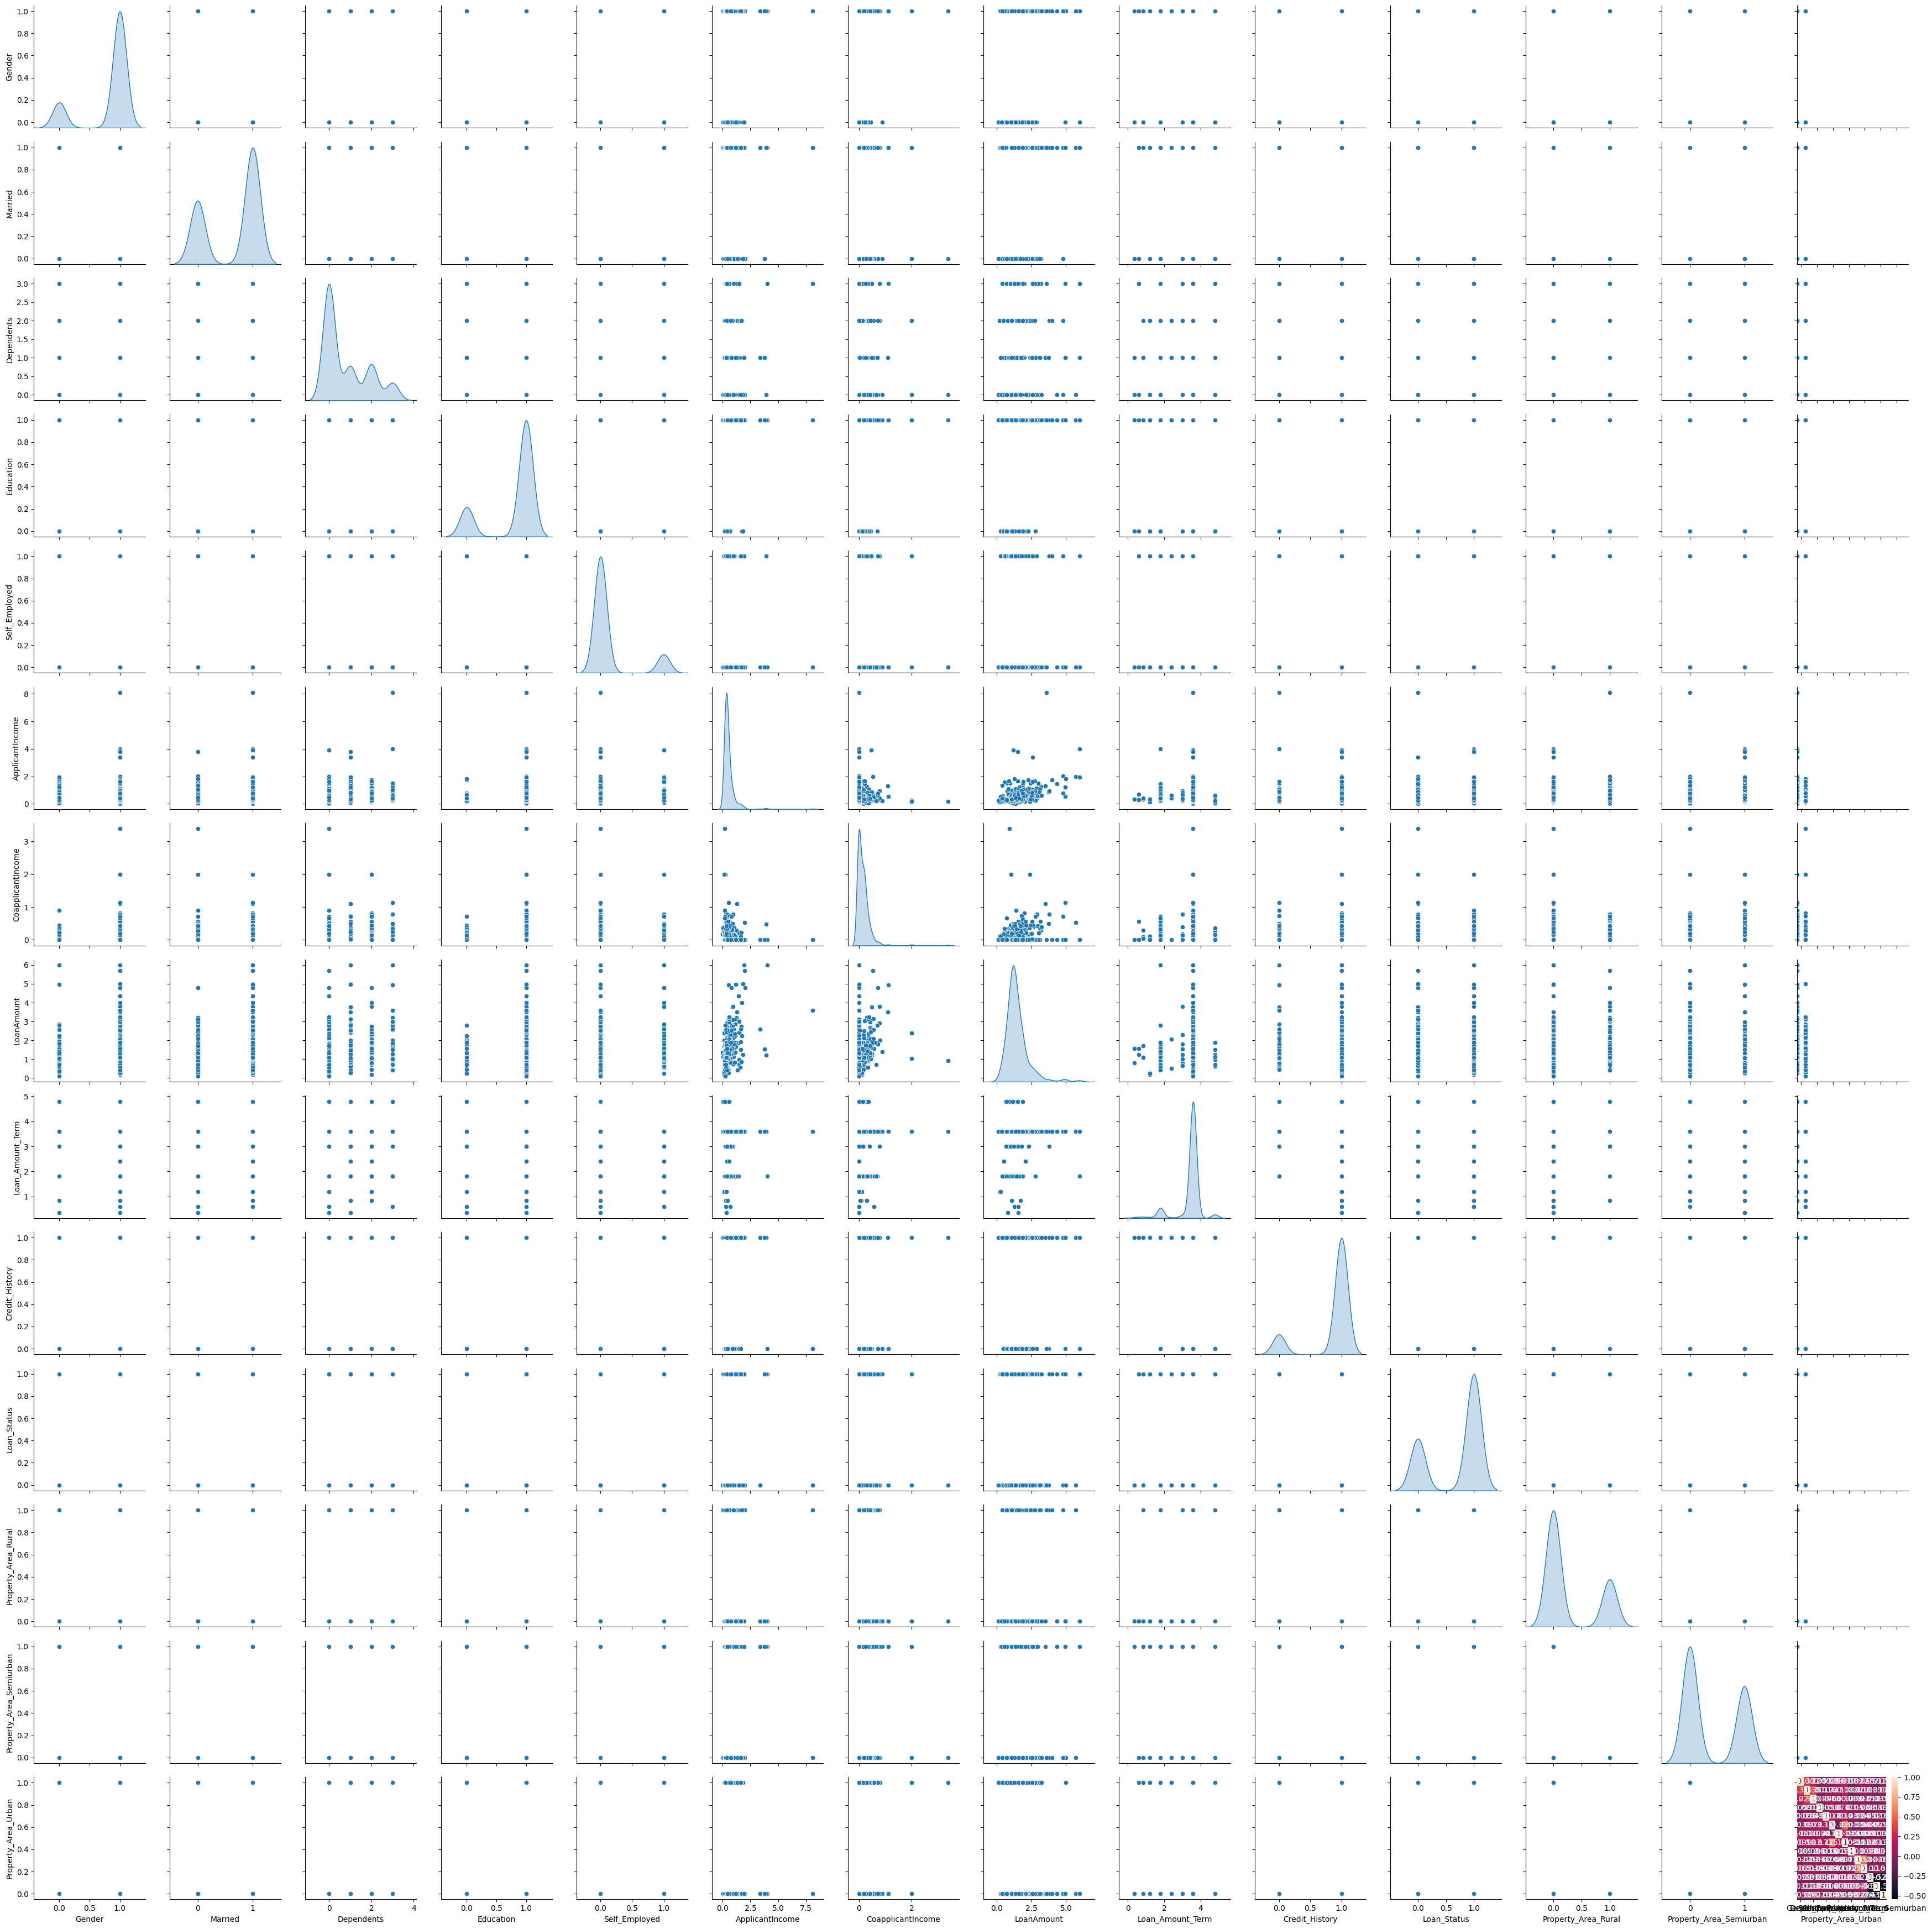

In [ ]:
print("pairplot")
sns.pairplot(Database, diag_kind='kde')



heatmap


<Axes: >

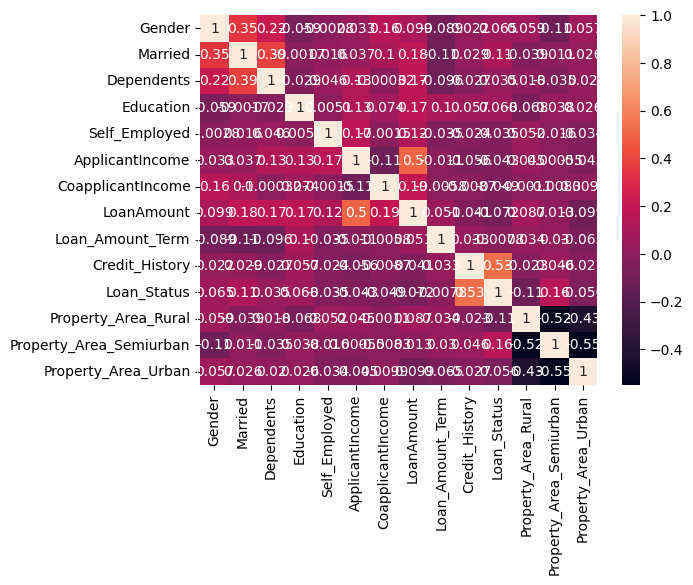

In [ ]:
print("heatmap")
sns.heatmap(Database.corr(), annot= True)

Task 3 (20 points): Logistic Regression Implementation

1. Implement Logistic Regression from scratch, including the vectorized implementation of
cost function and gradient descent.

Since the code was used for VIF, the functions are the same as above, but with the proper y value.

[0.69314718]
[0.50835029]
[0.48122032]
[0.47105504]
[0.46635957]
[0.46383352]
[0.46229602]
[0.46125949]
[0.46050114]
[0.45991097]
[0.45943109]
[0.45902907]
[0.45868566]
[0.45838863]
[0.45812973]
[0.45790296]
[0.45770376]
[0.45752846]
[0.45737406]
[0.45723798]
[0.45711801]
[0.45701222]
[0.45691893]
[0.45683667]
[0.45676414]
[0.45670017]
[0.45664377]
[0.45659402]
[0.45655017]
[0.45651148]
[0.45647737]
[0.45644729]
[0.45642075]
[0.45639735]
[0.45637672]
[0.45635852]
[0.45634246]
[0.4563283]
[0.45631581]
[0.45630478]
[0.45629506]
[0.45628648]
[0.45627891]
[0.45627224]
[0.45626634]
[0.45626114]
[0.45625656]
[0.45625251]
[0.45624893]
[0.45624577]
[0.45624299]
[0.45624053]
[0.45623837]
[0.45623645]
[0.45623477]
[0.45623327]
[0.45623195]
[0.45623079]
[0.45622977]
[0.45622886]
[0.45622806]
[0.45622736]
[0.45622673]
[0.45622619]
[0.4562257]
[0.45622526]
[0.45622489]
[0.45622455]
[0.45622426]
[0.456224]
[0.45622377]
[0.45622357]
[0.45622339]
[0.45622322]
[0.45622309]
[0.45622296]
[0.45622285]
[0.

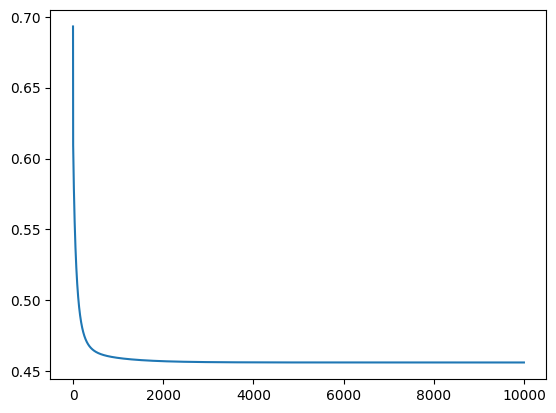

In [ ]:
#Initialized values
y = Database['Loan_Status'].to_numpy().reshape(-1, 1)
x = Database.drop('Loan_Status', axis = 1).T
w = np.zeros(shape = (x.shape[0], 1))
b = 0
N = len(y)
alpha = 0.2
epochs = 10000


#Runs logistic regression
lossgraph = np.zeros((epochs, 1))
for i in range(epochs):
  lossgraph[i] = NLL(w, x, b, y, N)
  dw = DerivativeW(w, x, b, y, N)
  db = DerivativeB(w, x, b, y, N)
  w = update(w, dw, alpha)
  b = update(b, db, alpha)
  if i % 100 == 0:
    print(lossgraph[i])
plt.plot(lossgraph)




2. Implement and compare the three gradient descent variants (e.g., batch gradient
descent, stochastic gradient descent, and mini-batch gradient descent). Explain their
convergence properties with respect to your cost function.

In [ ]:
#randomized ordering for stochastic and mini-batch
order = list(range(0, len(y)))
random.shuffle(order)
print(order)

[359, 340, 118, 320, 162, 37, 10, 5, 418, 54, 440, 197, 18, 353, 142, 47, 181, 355, 3, 312, 413, 222, 227, 81, 8, 208, 301, 257, 476, 303, 404, 109, 183, 164, 217, 172, 459, 441, 416, 433, 455, 458, 91, 134, 72, 431, 362, 127, 77, 453, 399, 128, 38, 274, 236, 31, 78, 74, 46, 255, 205, 325, 149, 238, 365, 43, 96, 451, 468, 291, 177, 49, 210, 232, 146, 93, 150, 57, 102, 275, 477, 387, 194, 84, 428, 310, 378, 241, 168, 82, 158, 292, 135, 174, 219, 349, 336, 350, 361, 166, 248, 230, 332, 469, 24, 352, 40, 474, 318, 266, 448, 216, 322, 154, 218, 139, 206, 396, 388, 179, 165, 169, 20, 374, 124, 394, 120, 141, 395, 273, 272, 167, 123, 294, 173, 178, 366, 357, 155, 76, 52, 420, 317, 63, 83, 408, 377, 191, 126, 85, 151, 145, 254, 256, 116, 385, 288, 338, 58, 121, 28, 466, 113, 339, 265, 195, 391, 186, 189, 80, 132, 67, 415, 364, 249, 298, 94, 163, 188, 279, 234, 223, 348, 471, 281, 376, 207, 392, 328, 278, 436, 62, 51, 329, 306, 444, 447, 235, 143, 4, 243, 270, 414, 333, 242, 21, 373, 59, 313, 

0.6931471824645996
0.6923467097183068
0.6915531188249588
0.690766382838289
0.689986110975345
0.6892125462492307
0.6884457739690939
0.6876854638258616
0.6869315009564161
0.686184044306477
0.6854431187113126
0.6847085617482662
0.6839803212632736
0.683258230984211
0.6825425326824188
0.681832858795921
0.6811292673150698
0.6804318418105443
0.6797402754426003
0.6790547660241524
0.6783753838390112
0.6777017758538325
0.6770341380188862
0.6763723121335109
0.6757161110639572
0.6750658560544253
0.6744212544212739
0.6737822035948435
0.6731487199664116
0.6725208909561237
0.6718984329452117
0.6712816044688225
0.6706702249745528
0.6700640370448431
0.6694633637865385
0.6688679710030556
0.6682779155671597
0.6676932041843732
0.667113596200943
0.6665390998125076
0.6659696888178587
0.6654053226113319
0.6648461040109396
0.6642918498565753
0.6637426336606344
0.663198284432292
0.6626590110361577
0.6621244507531325
0.661594720929861
0.6610697624584039
0.6605496123433113
0.660034041851759
0.6595232273141542
0.

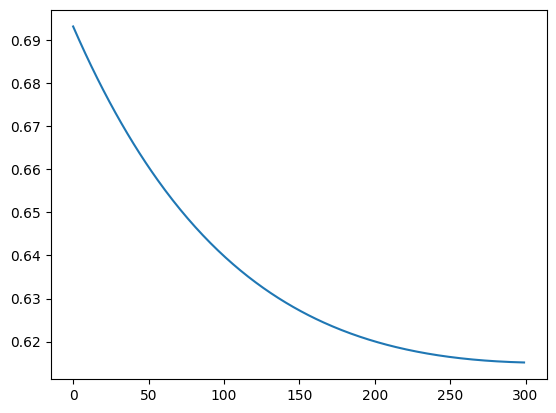

In [ ]:
#Initialized values for stochastic
y = Database['Loan_Status'].to_numpy().reshape(-1, 1)
x = Database.drop('Loan_Status', axis = 1).T.to_numpy()
w = np.zeros(shape = (x.shape[0], 1))
b = 0
N = len(y)
alpha = 0.000002
epochs = 300


#Runs logistic regression for stochastic
lossgraph = np.zeros((epochs))
for i in range(epochs):
  order = list(range(0, len(y)))
  random.shuffle(order)
  lossgraph[i] = NLL(w, x, b, y, N)
  for j in order:
    dw = DerivativeW(w, x[0][j], b, y[j][0], 1)
    db = DerivativeB(w, x[0][j], b, y[j][0], 1)
    w = update(w, dw, alpha)
    b = update(b, db, alpha)
  print(lossgraph[i])
plt.plot(lossgraph)

[0.69314718]
[0.68920777]
[0.68543497]
[0.68182664]
[0.67836619]
[0.67505855]
[0.67188891]
[0.66885658]
[0.66596128]
[0.66318907]
[0.66054024]
[0.6580101]
[0.65559107]
[0.6532838]
[0.65107914]
[0.64897648]
[0.64697208]
[0.6450616]
[0.64324065]
[0.64150427]
[0.63984982]
[0.63827662]
[0.63678036]
[0.63535748]
[0.63400449]
[0.63272074]
[0.6315042]
[0.63034767]
[0.62925307]
[0.62821673]
[0.62723464]
[0.62630613]
[0.62542817]
[0.62460221]
[0.62382304]
[0.62308911]
[0.62239873]
[0.62174968]
[0.62114066]
[0.62056964]
[0.62003596]
[0.61953826]
[0.619074]
[0.61864217]
[0.61824172]
[0.6178704]
[0.61752769]
[0.61721259]
[0.61692379]
[0.61666041]
[0.61642109]
[0.61620468]
[0.61601031]
[0.61583756]
[0.61568462]
[0.61555087]
[0.61543567]
[0.61533816]
[0.61525773]
[0.61519324]
[0.61514436]
[0.61511008]
[0.61508993]
[0.61508311]
[0.61508918]
[0.61510748]
[0.61513746]
[0.61517842]
[0.61523008]
[0.61529182]


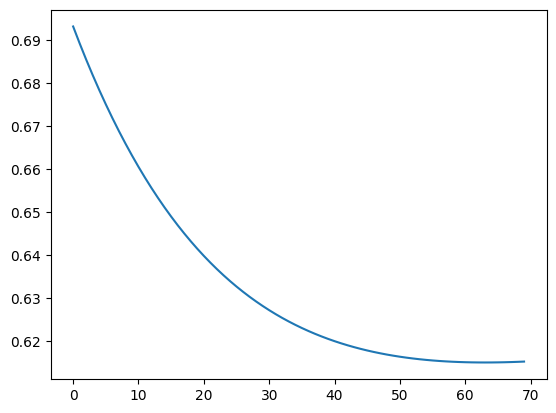

In [ ]:
#Initialized values for mini-batch
y = Database['Loan_Status'].to_numpy().reshape(-1, 1)
x = Database.drop('Loan_Status', axis = 1).T.to_numpy()
w = np.zeros(shape = (x.shape[0], 1))
b = 0
N = len(y)
alpha = 0.0002
epochs = 70
batchsize = 20

#Runs logistic regression for stochastic
lossgraph = np.zeros((epochs, 1))
for i in range(epochs):
  order = list(range(0, len(y)))
  random.shuffle(order)
  batchnumber = 0
  dw = np.zeros(shape = (x.shape[0], 1))
  db = 0
  lossgraph[i] = NLL(w, x, b, y, N)
  for j in order:
    batchnumber = batchnumber + 1
    dw = dw + DerivativeW(w, x[0][j], b, y[j][0], 1)
    db = db + DerivativeB(w, x[0][j], b, y[j][0], 1)
    if batchnumber == 20:
      dw = dw / batchnumber
      db = db / batchnumber
      batchnumber = 0
      w = update(w, dw, alpha)
      b = update(b, db, alpha)
      dw = np.zeros(shape = (x.shape[0], 1))
      db = 0
  print(lossgraph[i])
plt.plot(lossgraph)

Stochastic seems to converge in less epochs than batch, but isn't as accurate.
Batch seems to be the least prone to errors, but takes the most epochs to converge.
Mini-batch converged fastest, but wasn't as accurate.

I know that Batch is supposed to be the slowest and most accurate, so that seems good. Stochastic is supposed to be fastest, but most prone to noise, so it's somewhat concerning that Mini-batch was faster. Mini-batch is supposed to be a middle value, so it's weird that it seemed more error-prone than stochastic.

Task 4 (40 points): Optimization Techniques and Advanced Comparison


1. Implement or use packages to incorporate any three optimization algorithms (e.g.,
Momentum, RMSProp, Adam). Compare their performance with the vanilla stochastic
gradient descent implementation from Task 3.

In [ ]:
import tensorflow as tf
from sklearn.metrics import f1_score

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
#adam optimizer
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision()])

In [ ]:
#Initialized values
y = Database['Loan_Status']
x = Database.drop('Loan_Status', axis = 1)

model.fit(x, y, epochs=100, batch_size=1)
adamresults = model.evaluate(x, y)
adamf1a = model.predict(x)
adamf1a = (adamf1a > 0.5).astype(int)
adamf1 = f1_score(y, adamf1a)


Epoch 1/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8300 - loss: 0.4796 - precision: 0.8273
Epoch 2/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8154 - loss: 0.4950 - precision: 0.8142
Epoch 3/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8093 - loss: 0.4885 - precision: 0.8100
Epoch 4/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7966 - loss: 0.5313 - precision: 0.8003
Epoch 5/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8276 - loss: 0.4907 - precision: 0.8033
Epoch 6/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8064 - loss: 0.4885 - precision: 0.7913
Epoch 7/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8188 - loss: 0.4694 - precision: 0.8013
Epoch 8/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8044 - loss: 0.4887 - precision: 0.7929
Epoch 9/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8490 - loss: 0.4096 - precision: 0.8422
Epoch 10/100
480/480 ━━━━━━━━━━━━━━━━

In [ ]:
print(adamf1)

0.8768606224627875


In [ ]:
#momentum optimizer:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision()])
model.fit(x, y, epochs = 100, batch_size=1)
momentumresults = model.evaluate(x, y)
momentumf1a = model.predict(x)
momentumf1a = (momentumf1a > 0.5).astype(int)
momentumf1 = f1_score(y, momentumf1a)
print(momentumf1)


Epoch 1/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7716 - loss: 0.5042 - precision_2: 0.7956
Epoch 2/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7745 - loss: 0.4941 - precision_2: 0.7911
Epoch 3/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7877 - loss: 0.5652 - precision_2: 0.8278
Epoch 4/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7507 - loss: 0.5780 - precision_2: 0.7574
Epoch 5/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7976 - loss: 0.5077 - precision_2: 0.8110
Epoch 6/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7351 - loss: 0.5833 - precision_2: 0.7785
Epoch 7/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7594 - loss: 0.6168 - precision_2: 0.7869
Epoch 8/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7604 - loss: 0.5361 - precision_2: 0.7809
Epoch 9/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7755 - loss: 0.5695 - precision_2: 0.8007
Epoch 10/100
480/48

In [ ]:
#rmsprop compilation:
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision()])
model.fit(x, y, epochs = 100, batch_size=1)
rmspropresults = model.evaluate(x, y)
rmspropf1a = model.predict(x)
rmspropf1a = (rmspropf1a > 0.5).astype(int)
rmspropf1 = f1_score(y, rmspropf1a)
print(rmspropf1)

Epoch 1/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8080 - loss: 0.5061 - precision_3: 0.8001
Epoch 2/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8171 - loss: 0.4614 - precision_3: 0.8038
Epoch 3/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8000 - loss: 0.4743 - precision_3: 0.7790
Epoch 4/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7861 - loss: 0.5231 - precision_3: 0.7675
Epoch 5/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8110 - loss: 0.4733 - precision_3: 0.7929
Epoch 6/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8088 - loss: 0.4671 - precision_3: 0.7865
Epoch 7/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8315 - loss: 0.4206 - precision_3: 0.8113
Epoch 8/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8095 - loss: 0.4728 - precision_3: 0.7940
Epoch 9/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8084 - loss: 0.4770 - precision_3: 0.7875
Epoch 10/100
480/48

Adam gave a loss similar to my output for batch gradient descent, clearly better than my implementation of stochastic. RMS wasn't as good as Adam, but it provided a similar result. Finally, momentum pretty much hovered around the .8 accuracy and .5 loss mark the whole time, pretty similar to my stochastic and mini-batch, but better by about .1.


2. Define and use multiple evaluation metrics (e.g., precision, recall, F1 score) to analyze
and interpret results for each algorithm.

Adam: f1: 0.8768606224627875 - accuracy: 0.7877 - loss: 0.4750 - precision: 0.7683

Momentum: f1 : 0.876010781671159 - accuracy: 0.7854 - loss: 0.5695 - precision: 0.7658

RMSProp: f1 : 0.8801089918256131 - accuracy: 0.7895 - loss: 0.4941 - precision: 0.7724

We can see that each of these algorithms have a good balance between precision and recall, as well as a good precision. Thus, the positive predictions were often correct, and the positives were often identified correctly. Combined with the higher accuracy, these models did well, but I'd personally say RMSProp did the best at predictions.